In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Lire le fichier CSV
import pandas as pd

url = "Price_Agriculture_commodities_Week.csv"
df = pd.read_csv(url)

# Afficher les premières lignes du dataframe
print(df.head())

     State District    Market              Commodity      Variety Grade  \
0  Gujarat   Amreli  Damnagar  Bhindi(Ladies Finger)       Bhindi   FAQ   
1  Gujarat   Amreli  Damnagar                Brinjal        Other   FAQ   
2  Gujarat   Amreli  Damnagar                Cabbage      Cabbage   FAQ   
3  Gujarat   Amreli  Damnagar            Cauliflower  Cauliflower   FAQ   
4  Gujarat   Amreli  Damnagar      Coriander(Leaves)    Coriander   FAQ   

  Arrival_Date  Min Price  Max Price  Modal Price  
0   27-07-2023     4100.0     4500.0       4350.0  
1   27-07-2023     2200.0     3000.0       2450.0  
2   27-07-2023     2350.0     3000.0       2700.0  
3   27-07-2023     7000.0     7500.0       7250.0  
4   27-07-2023     8400.0     9000.0       8850.0  


In [ ]:
df.info()

**Visualization of price distributions**

* Price distribution: View minimum, maximum and modal price distributions
* Category Distribution: View the distribution of categorical variables (State, District, Market, Commodity, Variety, Grade)
* Relationship between variables: Visualize the relationships between numerical variables.






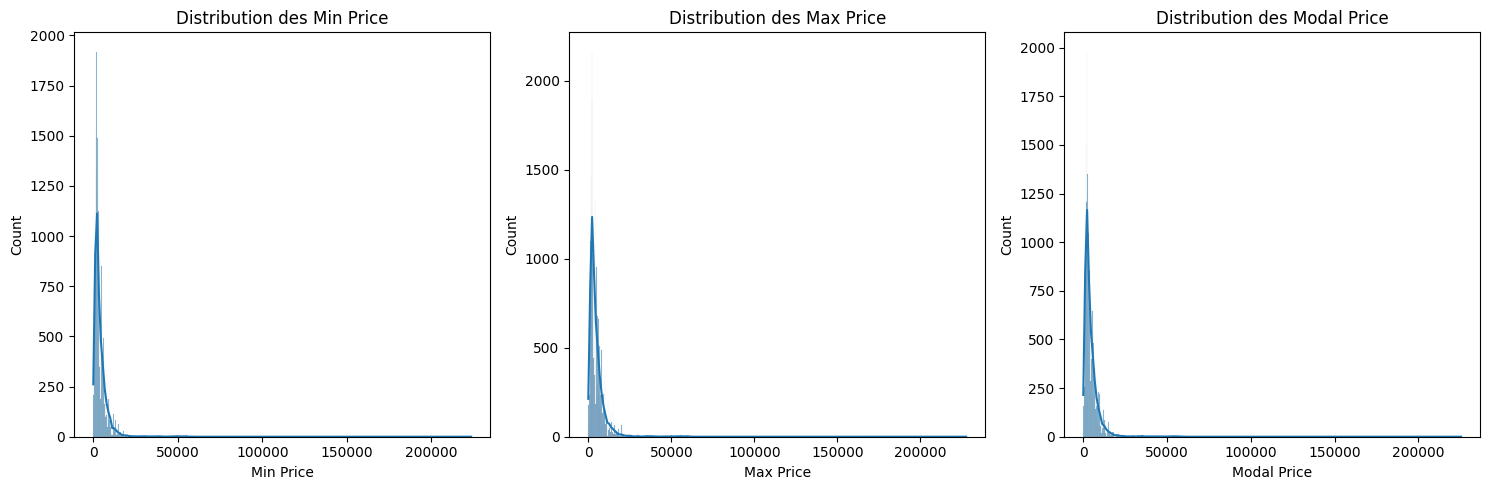

In [13]:
# Visualization of price distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Min Price'], kde=True)
plt.title('Distribution of Min Price')

plt.subplot(1, 3, 2)
sns.histplot(df['Max Price'], kde=True)
plt.title('Distribution of Max Price')

plt.subplot(1, 3, 3)
sns.histplot(df['Modal Price'], kde=True)
plt.title('Distribution of Modal Price')

plt.tight_layout()
plt.show()

**Visualisation de la répartition des catégories, juste les catégories les plus fréquetes**

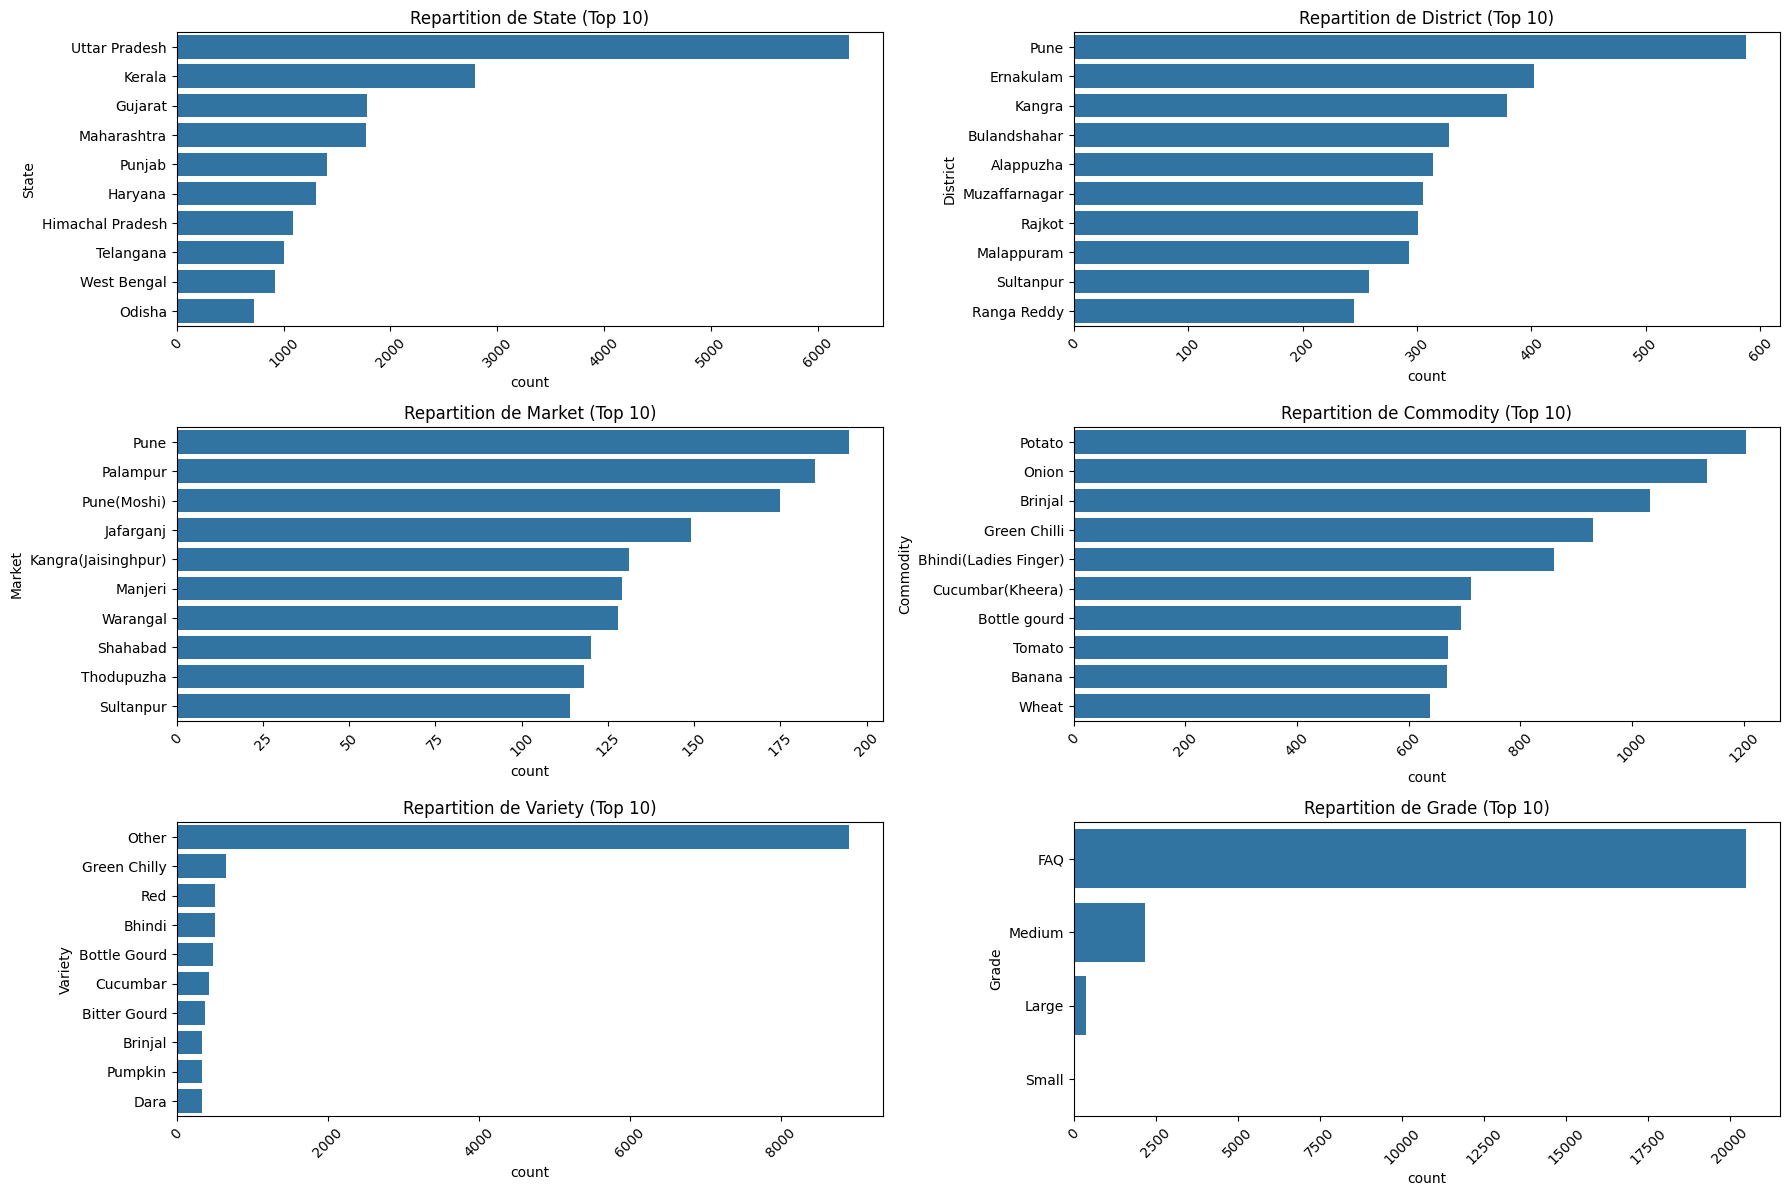

In [16]:
plt.figure(figsize=(18, 12))

variables_categorielles = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

for i, var in enumerate(variables_categorielles, 1):
    plt.subplot(3, 2, i)
    top_categories = df[var].value_counts().nlargest(10).index
    sns.countplot(y=df[df[var].isin(top_categories)][var], order=top_categories)
    plt.title(f'Repartition de {var} (Top 10)')
    plt.tight_layout()
    plt.xticks(rotation=45)

plt.show()

***Nettoyage des données***

In [23]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64


** Conversion de la colonne Arrival_Date en type datetime**

In [30]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')

<ipython-input-30-1264ec0790c3>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')


In [31]:
# Remplir les valeurs manquantes
# Pour les colonnes numériques
from scipy import stats
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Pour les colonnes catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Identifier les valeurs aberrantes en utilisant les z-scores
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df[filtered_entries]

print("Données nettoyées :\n", df_clean.head())

Données nettoyées :
      State District    Market              Commodity      Variety Grade  \
0  Gujarat   Amreli  Damnagar  Bhindi(Ladies Finger)       Bhindi   FAQ   
1  Gujarat   Amreli  Damnagar                Brinjal        Other   FAQ   
2  Gujarat   Amreli  Damnagar                Cabbage      Cabbage   FAQ   
3  Gujarat   Amreli  Damnagar            Cauliflower  Cauliflower   FAQ   
4  Gujarat   Amreli  Damnagar      Coriander(Leaves)    Coriander   FAQ   

  Arrival_Date  Min Price  Max Price  Modal Price  
0   2023-07-27     4100.0     4500.0       4350.0  
1   2023-07-27     2200.0     3000.0       2450.0  
2   2023-07-27     2350.0     3000.0       2700.0  
3   2023-07-27     7000.0     7500.0       7250.0  
4   2023-07-27     8400.0     9000.0       8850.0  


**Afficher les données originales et transformées**

In [32]:
# Afficher un extrait des données originales
print("Données originales :\n", df.head())

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Afficher les données après remplissage des valeurs manquantes
print("Données après remplissage des valeurs manquantes :\n", df.head())

# Afficher les données après suppression des valeurs aberrantes
print("Données après suppression des valeurs aberrantes :\n", df_clean.head())

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

Données originales :
      State District    Market              Commodity      Variety Grade  \
0  Gujarat   Amreli  Damnagar  Bhindi(Ladies Finger)       Bhindi   FAQ   
1  Gujarat   Amreli  Damnagar                Brinjal        Other   FAQ   
2  Gujarat   Amreli  Damnagar                Cabbage      Cabbage   FAQ   
3  Gujarat   Amreli  Damnagar            Cauliflower  Cauliflower   FAQ   
4  Gujarat   Amreli  Damnagar      Coriander(Leaves)    Coriander   FAQ   

  Arrival_Date  Min Price  Max Price  Modal Price  
0   2023-07-27     4100.0     4500.0       4350.0  
1   2023-07-27     2200.0     3000.0       2450.0  
2   2023-07-27     2350.0     3000.0       2700.0  
3   2023-07-27     7000.0     7500.0       7250.0  
4   2023-07-27     8400.0     9000.0       8850.0  
Valeurs manquantes par colonne :
 State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
d

**Encodage des variables catégorielles**

In [33]:
df_encoded = pd.get_dummies(df_clean, columns=variables_categorielles)

**Visualiser les Valeurs Aberrantes**

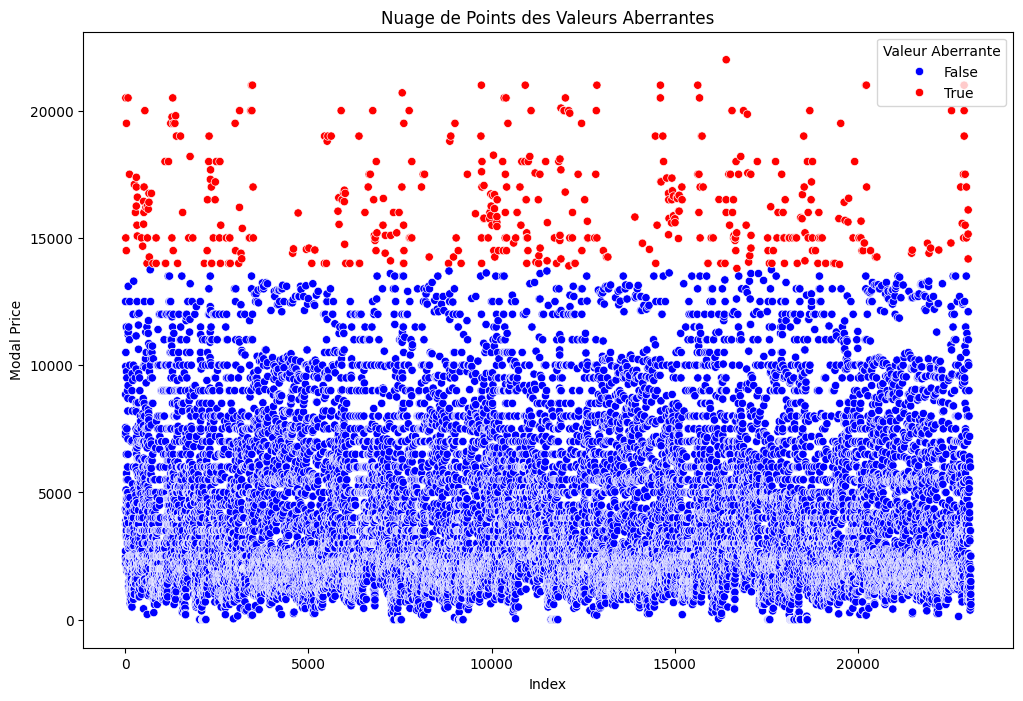

In [72]:
from scipy import stats
z_scores = stats.zscore(df_encoded['Modal Price'])
abs_z_scores = abs(z_scores)
threshold = 3
df_encoded['is_outlier'] = abs_z_scores > threshold

# Visualiser les données
plt.figure(figsize=(12, 8))

# Afficher les points normaux
sns.scatterplot(x=df_encoded.index, y=df_encoded['Modal Price'], hue=df_encoded['is_outlier'], palette={True: 'red', False: 'blue'}, marker='o')
plt.title('Nuage de Points des Valeurs Aberrantes')
plt.xlabel('Index')
plt.ylabel('Modal Price')
plt.legend(title='Valeur Aberrante', loc='upper right')
plt.show()

**Céer un nouveau dataset sans les valeurs abérantes**
# Calculer les quantiles
Q1 = df['Modal Price'].quantile(0.25)
Q3 = df['Modal Price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trouver les valeurs aberrantes
outliers = df[(df['Modal Price'] < lower_bound) | (df['Modal Price'] > upper_bound)]

# Trouver les données non-aberrantes
non_outliers = df[(df['Modal Price'] >= lower_bound) & (df['Modal Price'] <= upper_bound)]

# Enregistrer les DataFrames dans des fichiers CSV (optionnel)
outliers.to_csv('valeurs_aberrantes.csv', index=False)
non_outliers.to_csv('donnees_non_aberrantes.csv', index=False)

print(f"Valeurs aberrantes stockées dans 'valeurs_aberrantes.csv'")
print(f"Données non-aberrantes stockées dans 'donnees_non_aberrantes.csv'")

In [73]:
# Calculer les quantiles
df = df_encoded.copy()
Q1 = df['Modal Price'].quantile(0.25)
Q3 = df['Modal Price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trouver les valeurs aberrantes
outliers = df[(df['Modal Price'] < lower_bound) | (df['Modal Price'] > upper_bound)]

# Trouver les données non-aberrantes
non_outliers = df[(df['Modal Price'] >= lower_bound) & (df['Modal Price'] <= upper_bound)]

# Enregistrer les DataFrames dans des fichiers CSV (optionnel)
outliers.to_csv('valeurs_aberrantes.csv', index=False)
non_outliers.to_csv('donnees_non_aberrantes.csv', index=False)

print(f"Valeurs aberrantes stockées dans 'valeurs_aberrantes.csv'")
print(f"Données non-aberrantes stockées dans 'donnees_non_aberrantes.csv'")

Valeurs aberrantes stockées dans 'valeurs_aberrantes.csv'
Données non-aberrantes stockées dans 'donnees_non_aberrantes.csv'


In [74]:
non_outliers.head()

,Arrival_Date,Min Price,Max Price,Modal Price,State_Andaman and Nicobar,State_Andhra Pradesh,State_Bihar,State_Chandigarh,State_Chattisgarh,State_Gujarat,...,Variety_Yam (Ratalu),Variety_Yellow,Variety_Yellow (Black),Variety_api,Variety_other,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,is_outlier
0,2023-07-27,4100.0,4500.0,4350.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2023-07-27,2200.0,3000.0,2450.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2023-07-27,2350.0,3000.0,2700.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,2023-07-27,7000.0,7500.0,7250.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,2023-07-27,8400.0,9000.0,8850.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


Division des données

In [75]:
from sklearn.preprocessing import StandardScaler
df_encoded = df.copy()
# Séparer les colonnes de type date pour ne pas les normaliser
date_columns = df_encoded.select_dtypes(include=['datetime']).columns

# Séparer les features et la cible
X = df_encoded.drop(['Modal Price'] + list(date_columns), axis=1)
y = df_encoded['Modal Price']

# Diviser les données en ensembles d'entraînement et de test (80% - 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser les données temporaires en ensembles de validation et de test (50% - 50% de l'ensemble temporaire)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Ensemble de validation : {X_val.shape[0]} échantillons")
print(f"Ensemble de test : {X_test.shape[0]} échantillons")


Ensemble d'entraînement : 18227 échantillons
Ensemble de validation : 2278 échantillons
Ensemble de test : 2279 échantillons


**Normalisation des données**

In [76]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])
print("Données normalisées.")


Données normalisées.


**# Afficher un extrait des valeurs initiales et transformées dans un même tableau**

In [82]:
extrait_initial = df_encoded.head()
extrait_transforme = df_clean.head()


**extrait_initial**

In [80]:
extrait_initial

,Arrival_Date,Min Price,Max Price,Modal Price,State_Andaman and Nicobar,State_Andhra Pradesh,State_Bihar,State_Chandigarh,State_Chattisgarh,State_Gujarat,...,Variety_Yam (Ratalu),Variety_Yellow,Variety_Yellow (Black),Variety_api,Variety_other,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,is_outlier
0,2023-07-27,4100.0,4500.0,4350.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2023-07-27,2200.0,3000.0,2450.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2023-07-27,2350.0,3000.0,2700.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,2023-07-27,7000.0,7500.0,7250.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,2023-07-27,8400.0,9000.0,8850.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


**extrait_transforme**

In [83]:
extrait_transforme

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,2023-07-27,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,2023-07-27,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,2023-07-27,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,2023-07-27,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,2023-07-27,8400.0,9000.0,8850.0


On peut dire que là il n'y ap vraiment de différence, mais si... 🙂*

**Random forest**

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Initialiser le modèle Random Forest Regressor**

In [85]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

**Entraîner le modèle sur les données d'entraînement**

In [86]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

**Prédire sur l'ensemble de test**

In [87]:
y_pred = rf_model.predict(X_test_scaled)

**Calculer les métriques de performance**

In [88]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 232.82967464473356
R²: 0.9947696423059721


**Interpretation**
Ces valeurs de performance modèle Random Forest indiquent des résultats très prometteurs :



*   RMSE (Root Mean Squared Error) : 289.35
  Cela mesure la racine carrée de la moyenne des erreurs quadratiques entre les valeurs prédites et les valeurs réelles. Une valeur plus faible est meilleure, ce qui signifie que le modèle a une erreur moyenne faible dans ses prédictions.


*   R² (Coefficient de Détermination) : 0.99
Ce score indique que 99% de la variance des données cibles est expliquée par le modèle. Une valeur proche de 1 signifie que le modèle s'ajuste très bien aux données, ce qui est excellent pour la régression.


**Evaluation du modèle**



1.   Validation Croisée



In [89]:
from sklearn.model_selection import cross_val_score

# Effectuer la validation croisée
# Les scores sont retournés sous forme d'erreurs négatives (par défaut pour la régression)
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir les scores négatifs en RMSE
rmse_scores = np.sqrt(-scores)

print(f"Scores RMSE pour chaque fold : {rmse_scores}")
print(f"RMSE moyen : {rmse_scores.mean()}")
print(f"Écart-type des RMSE : {rmse_scores.std()}")

Scores RMSE pour chaque fold : [236.37918666 263.44718845 176.79634457 295.77654052 213.64495252]
RMSE moyen : 237.20884254524154
Écart-type des RMSE : 40.80255187074356


Explication des Paramètres
RandomForestRegressor : Le modèle de régression que vous utilisez.
cross_val_score : Effectue la validation croisée.
X : Les caractéristiques (features) du modèle.
y : La cible (target) du modèle.
cv=5 : Nombre de folds pour la validation croisée (ici, 5)
scoring='neg_mean_squared_error' : Utilise l'erreur quadratique moyenne négative pour la régression (les scores retournés sont négatifs, donc on les convertit en valeurs positives en utilisant -scores).

**Tester les Prédictions avec les Données de Validation**

RMSE sur l'ensemble de validation : 10045.533155723087
R² sur l'ensemble de validation : -8.670626813616336


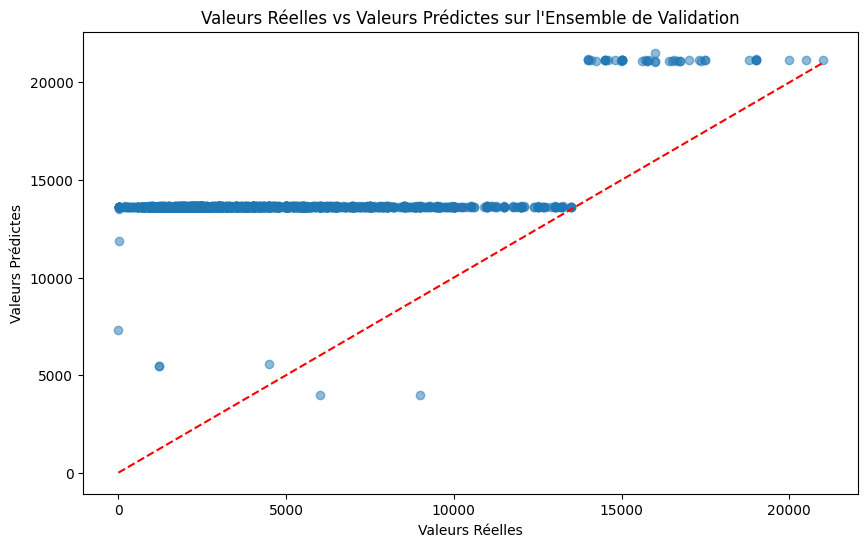

In [90]:
# Faire des prédictions sur l'ensemble de validation
y_val_pred = rf_model.predict(X_val)

# Calculer les métriques de performance
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f"RMSE sur l'ensemble de validation : {rmse_val}")
print(f"R² sur l'ensemble de validation : {r2_val}")

# Afficher quelques prédictions vs valeurs réelles

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédictes')
plt.title('Valeurs Réelles vs Valeurs Prédictes sur l\'Ensemble de Validation')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()